In [1]:
# Display plots directly in the notebook instead of in a new window
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
eloDf = pd.read_csv('nbaallelo.csv')

In [3]:
eloDf.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,...,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,...,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN


In [4]:
uniqueTeams = eloDf.team_id.unique()
print(uniqueTeams)
print(uniqueTeams.size)

['TRH' 'NYK' 'CHS' 'DTF' 'WSC' 'BOS' 'PRO' 'PIT' 'STB' 'CLR' 'PHW' 'BLB'
 'INJ' 'FTW' 'MNL' 'ROC' 'TRI' 'DNN' 'INO' 'SHE' 'WAT' 'AND' 'SYR' 'MLH'
 'STL' 'DET' 'CIN' 'LAL' 'CHP' 'CHZ' 'SFW' 'BAL' 'PHI' 'CHI' 'SEA' 'OAK'
 'ANA' 'SDR' 'KEN' 'INA' 'DNR' 'DLC' 'HSM' 'NOB' 'MNM' 'NJA' 'PTP' 'ATL'
 'MIL' 'PHO' 'NYA' 'MMF' 'MNP' 'LAS' 'CAR' 'WSA' 'BUF' 'CLE' 'UTS' 'FLO'
 'PTC' 'POR' 'VIR' 'TEX' 'MMP' 'HOU' 'GSW' 'KCO' 'MMT' 'SDA' 'CAP' 'SAA'
 'NOJ' 'DNA' 'SSL' 'MMS' 'WSB' 'KCK' 'SDS' 'IND' 'NYN' 'DEN' 'SAS' 'NJN'
 'SDC' 'UTA' 'DAL' 'LAC' 'SAC' 'CHH' 'MIA' 'MIN' 'ORL' 'VAN' 'TOR' 'WAS'
 'MEM' 'NOH' 'CHA' 'NOK' 'OKC' 'BRK' 'NOP' 'CHO']
104


In [5]:
# Drop teams that haven't played at least 15 NBA seasons
for team in uniqueTeams:
    yearsPlayed = eloDf.loc[eloDf['team_id'] == team].year_id.unique().size
    if yearsPlayed < 15:
        eloDf.drop(eloDf[eloDf.team_id == team].index, inplace=True)

uniqueTeams = eloDf.team_id.unique()
uniqueTeams.size

30

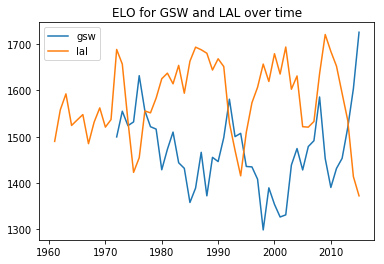

In [6]:
# Plot data for ELO of the Warriors and Lakers over time
gsw = eloDf.loc[eloDf['team_id'] == 'GSW']
gswActiveYears = gsw.year_id.unique()

lal = eloDf.loc[eloDf['team_id'] == 'LAL']
lalActiveYears = lal.year_id.unique()

gswData = []
for year in gswActiveYears:
    meanEloThisYear = gsw.loc[eloDf['year_id'] == year].elo_n.mean()
    gswData.append(meanEloThisYear)

lalData = []
for year in lalActiveYears:
    meanEloThisYear = lal.loc[eloDf['year_id'] == year].elo_n.mean()
    lalData.append(meanEloThisYear)

gswDf = pd.DataFrame(gswData, columns=['meanElo'], index=gswActiveYears)
lalDf = pd.DataFrame(lalData, columns=['meanElo'], index=lalActiveYears)


df = pd.concat([gswDf, lalDf], ignore_index=True, axis=1)
df.columns = ['gsw', 'lal']

df.plot(kind='line', title='ELO for GSW and LAL over time')

# eloDf.drop(columns=['gameorder', 'game_id', 'lg_id', '_iscopy', 'seasongame', 
#                      'is_playoffs', 'fran_id', 'pts', 'elo_i', 'win_equiv', 'opp_id',
#                      'opp_fran', 'opp_pts', 'opp_elo_i', 'opp_elo_n', 'game_location',
#                      'game_result', 'forecast', 'notes'])

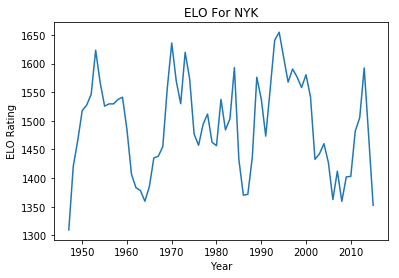

In [ ]:
# Plot data for ELO of all teams over time
for team in uniqueTeams:
    teamData = eloDf.loc[eloDf['team_id'] == team]
    activeYears = teamData.year_id.unique()

    data = []
    for year in activeYears:
        meanEloThisYear = teamData.loc[eloDf['year_id'] == year].elo_n.mean()
        data.append(meanEloThisYear)

    df = pd.DataFrame(data, columns=['meanElo'], index=activeYears)

    plt.plot(df)
    plt.title('ELO For %s' % team)
    plt.xlabel('Year')

    plt.ylabel('ELO Rating')
    plt.show()